# Feigenbaum Period-Doubling Scenario

Doctor Andrew D. Burbanks, 2014.

> This notebook aims to describe the Feigenbaum renormdalisation analysis for the universality observed in period-doubling cascades of unimodal maps.  Along the way, some elementary Dynamical Systems teminology is introduced, together with pedagogical examples.

<img src='figures/bif2.png' width='100%' />

### Configure the notebook

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
%config InlineBackend.close_figures=True

In [2]:
import math
import numpy
import matplotlib
import matplotlib.pyplot as plt

In [3]:
matplotlib.rcParams['figure.figsize'] = (5, 5)
matplotlib.rcParams['font.size'] = 12

# Part A. The period doubling cascade in unimodal maps

## Preliminaries

### Family of maps

**Definition:**
We consider the *logistic* family maps, defined by $f_\lambda:x\mapsto \lambda x(1-x)$
on the interval $x\in I=[0,1]$. The parameter $\lambda$ takes values in the interval $ A=[0,4]$.

Note that for each value of the parameter, $\lambda$, there is a particular map $f_\lambda:I\to I$.

In [4]:
def logistic(lam):
    def f_lam(x):
        return lam*x*(1-x)
    return f_lam

**Definition:**
A point $x_c$ is called a *critical point* of a particular map $f_\lambda$ if the derivative of the map at $x_c$ is zero; $f'(x_c)=0$.

Note that the maps in the logistic family each have a single critical point, $x_c=0.5$ (namely, a quadratic maximum).

In [5]:
I = (0, 1)
A = (0, 4)
xc = 0.5

### Orbit of an initial condition under the map

**Definition:**
Given a map, $f$, and an initial condition, $x_0$, we define the *forward orbit* of $x_0$ under $f$ to be the sequence of values $x_0, x_1, x_2, \ldots$ produced by applying the map repeatedly to the initial condition, i.e., we define $x_{k+1}=f(x_k)$ for $k\ge 0$.

In [6]:
def orbit(f, x0, n):
    x = x0
    yield x
    for k in range(1, n+1):
        x = f(x)
        yield x

**Example:** For example, the (forward) orbit of the initial point $x_0=0.1$ under the map $f_2$ begins with the following values $x_0,x_1,x_2,x_3,x_4,x_5$ given by:

In [7]:
list(orbit(logistic(2.0), 0.1, 5))

[0.1,
 0.18000000000000002,
 0.2952,
 0.41611392,
 0.4859262511644672,
 0.49960385918742867]

If we continue the orbit for a while longer, we notice that the values converge towards a single value, $x_k=0.5$:

In [8]:
list(orbit(logistic(2.0), 0.1, 10))

[0.1,
 0.18000000000000002,
 0.2952,
 0.41611392,
 0.4859262511644672,
 0.49960385918742867,
 0.49999968614491325,
 0.49999999999980305,
 0.5,
 0.5,
 0.5]

**Note:** This is simply a numerical experiment, rather than a precise mathematical calculation, and only the first few decimal places of each point, $x_k$, are being printed here.

**Definition:**
We say that any point $x^{*}$ for which $f(x^{*})=x^{*}$ is a *fixed point* of the map $f$.

Note that, for the logistic family, $f(0.5)=0.5$.  Thus the sequence observed above appears to be converging to the fixed point $x^{*}=0.5$. Note that other choices of initial condition, $x_0$ lead to the same behaviour (with the single exception of the point $x_0=0$ which is another fixed point):

In [9]:
list(orbit(logistic(2.0), 0.7, 5))

[0.7,
 0.42000000000000004,
 0.4872,
 0.49967231999999995,
 0.4999997852516352,
 0.4999999999999078]

Note that convergence to a fixed point is not the only kind of behaviour that is possible.

### Visualisation of orbits via time series plot

Plot time series and some examples of behaviour. Introduce periodic orbits, quasiperiodic motion, chaos. Define periodic orbits and point out that they are fixed points of iterates of the map, which leads to the below....

In [10]:
def plot_orbit(I, orbit, filename=None):
    fig = plt.figure(figsize=(6,3))
    ax = fig.gca()
    ax.grid(True)
    ax.plot(list(orbit), marker='.', label='$x^k$')
    ax.set_xlabel('$k$')
    ax.set_ylabel('$x^k$')
    #ax.set_xlim(0, len(orbit)-1)
    ax.set_ylim(*I)
    if filename is not None:
        plt.savefig('figures/'+filename)
    return fig, ax

**Example ($\lambda=2$, attraction to a fixed point):**

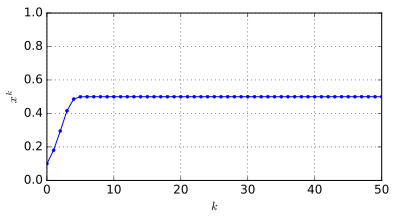

In [11]:
fig, ax = plot_orbit(I, orbit(logistic(2), 0.1, 50), filename='fig1.png')

Increasing the parameter value slightly from the above situation still results in attraction to the fixed point:

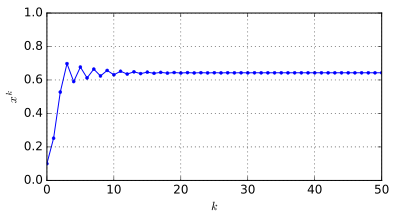

In [12]:
fig, ax = plot_orbit(I, orbit(logistic(2.8), 0.1, 50), filename='fig1b.png')

**Example ($\lambda=3.23$, attraction to a period-2 orbit):**

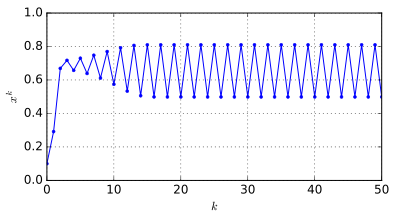

In [13]:
fig, ax = plot_orbit(I, orbit(logistic(3.24), 0.1, 50), filename='fig2.png')

**Example ($\lambda=3.5$, attraction to a period-4 orbit):**

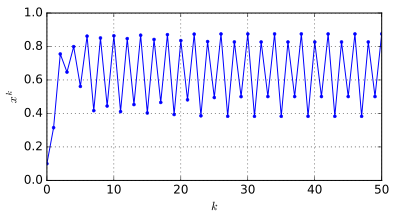

In [14]:
fig, ax = plot_orbit(I, orbit(logistic(3.5), 0.1, 50), filename='fig3.png')

**Example ($\lambda=3.55$, attraction to a period-4 orbit):**

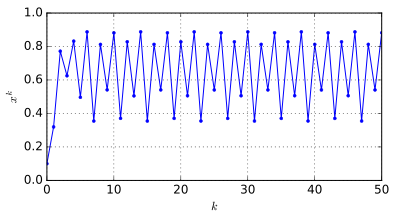

In [15]:
fig, ax = plot_orbit(I, orbit(logistic(3.55), 0.1, 50), filename='fig4.png')

**Example ($\lambda=4$, chaos):**

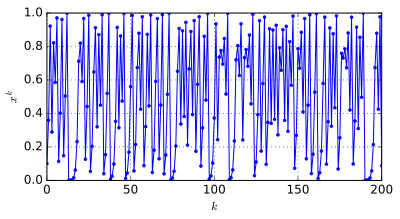

In [16]:
fig, ax = plot_orbit(I, orbit(logistic(4), 0.1, 200), filename='fig5.png')

### Periodic orbits

**Definition (cycle / periodic orbit):** We define a *periodic orbit of period $p$* (also known as a *$p$-cycle*) to be an orbit $x_0,x_1,x_2,\ldots$ such that, for some positive integer, $p$, we have

\begin{equation}
x_{k} = x_{k+p}\quad\mbox{for all $k\ge 0$.}
\end{equation}

**Note:** Notice that each point on a periodic orbit of period $p$ is a fixed point of the map $f^p:=f\circ f\circ \cdots \circ f$, i.e., $f$ composed with itself, $p$ times:

\begin{equation}
x_k = x_{k+p} = f^p(x_k).
\end{equation}

Thus periodic orbits can be understood in terms of fixed points of the "iterated map" $f^p$.

### Iterates of a map

**Definition:** We define the "$n$-th iterate" of a map $f$ via $f^n=f\circ f\circ\cdots\circ f$. In other words, $f^n$ represents the map $f$ composed with itself $n$ times.  Thus, $f^n(x)=f(f(f(\cdots f(f(x))\cdots)))$:

In [17]:
def iterate(f, n):
    def fn(x0):
        x = x0
        for k in range(n):
            x = f(x)
        return x
    return fn

### Stability of periodic orbit

Note that the stability of a fixed point, $x^{*}$, is determined by the magnitude, $|f'(x^{*})|$ of the derivative of the map there. In particular, if $|f'(x^{*})|<1$ then the fixed point will be *attractive*; the orbits of nearby points will converge to the fixed point. In contrast, if $|f'(x^{*})|>1$, then the orbits of nearby points will be repelled.

We can examine the stability of period orbits by using the above observation that a periodic orbit corresponds to a fixed point of the iterated map $f^p$. Thus, the stability of a periodic orbit of period $p$ is determined by the quantity $|(f^p)'(x^{*})|$, where $x^{*}$ is one of the points on the periodic orbit. Using the chain rule of differentiation, notice that

\begin{align}
(f^p)'(x_0)
&= f'(f^{p-1}(x_0))
\cdot f'(f^{p-2}(x_0))
\cdot f'(f^{p-3}(x_0))
\cdots f'(f^{2}(x_0))
\cdot f'(f(x_0))
\cdot f'(x_0)\\
&= f'(x_0)\cdot f'(x_1)\cdot f'(x_2)\cdots f'(x_{p-1}).
\end{align}

Thus, the stability of a periodic orbit is determined by

1. the product of the derivatives, $f'(x_k)$, at the points, $x_k$, on the orbit,

2. or, equivalently, the derivative of the iterated map $(f^p)'(x_0)$ at a single point.

### Visualising (the iterates of) a map

We create a function for drawing graphs of a map, $f$, and its iterates, $f^k$:

In [18]:
def plot_map_iterates(I, f, iterates, n_points=2001, ax=None):
    if ax is None:
        ax = plt.gca()
        ax.grid(True)
    a, b = I
    x = numpy.linspace(a, b, n_points)
    for k in iterates:
        y = list(map(iterate(f, k), x))
        ax.plot(x, y, label='$f^{%d}$'%(k))
    ax.set_xlabel('$x$')
    ax.set_ylabel('$f^n(x)$')
    ax.set_xlim(*I)
    ax.set_ylim(*I)
    return ax

The graph of the logistic map, with parameter value $\lambda=1.5$, looks as follows:

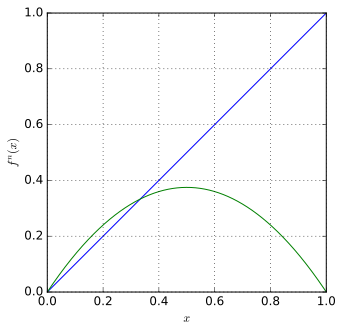

In [19]:
ax = plot_map_iterates(I, logistic(1.5), [0, 1])

**Observations:** The graph is a parabola, passing through a maximum at the single critical point $x_c=0.5$. The function $f$ has two fixed points, for which $f(x)=x$, indicated in the graph by the locations where the graph of $y=f(x)$ crosses the diagonal $y=x$. Changing the parameter value, $\lambda$, changes the height of the maximum at $x_c$, which is given by $f(x_c)=\lambda/4$ for this family of maps, and has the effect of moving the location of the second fixed point; increasing $\lambda$ moves the location of this fixed point to the right.

### Visualisation of orbits via graphical iteration

Recall that the (forward) orbit of an initial point, $x_0$, under a map, $f$, is given by the sequence $x_0,x_1,x_2,\ldots$, defined by $x_{k+1}=f(x_k)$.  In order to help to visualise the structure of the orbit, it is useful to "unpack" the iteration process as follows. We let

\begin{align}
y_k &= f(x_k),\\
x_{k+1} &= y_k.
\end{align}

The iteration can then be visualised graphically as repeated application of a $2$-step process, starting with the point $(x_0,x_0)$:

1. given the point $(x_k,x_k)$, "move vertically to the graph $f(x)$" at the point $(x_k, y_k)=(x_k,x_{k+1})$,
2. "move horizontally to the line $x=y$ at the point $(y_k,y_k)=(x_{k+1},x_{k+1})$.

Joining the resulting sequence of points $(x_0,x_0),(x_0,x_1),(x_1,x_1),(x_1,x_2),(x_2,x_2),\ldots$, results in a diagram called a *cobweb plot*. First, we collect the relevant cobweb points:

In [20]:
def cobweb_points(f, x0, n):
    x, y = x0, 0
    yield x, y
    for k in range(n):
        y = f(x)
        yield x, y
        x = y
        yield x, y

We then provide a function for graphical iteration by drawing the graph of $f$, the graph of the diagonal, and the cobweb points themselves:

In [21]:
def plot_slope(fig, ax, f, x, dx=0.2):
    y = f(x)
    dfx = (f(x+dx)-f(x-dx))/(2.0*dx)
    ax.plot([x-dx, x+dx], [y-dfx*dx, y+dfx*dx], color='c')

In [22]:
def graphical_iteration(I, f, x0, final=0, do_slope=False, ax=None, n=1001):
    if ax is None:
        ax = plt.gca()
        ax.grid(True)
    x = numpy.linspace(I[0], I[1], n)
    y = list(map(f, x))
    ax.plot(x, x)
    ax.plot(x, y)
    ax.plot(x0, 0, marker='D', color='w')
    N = 100
    x, y = zip(*cobweb_points(f, x0, N))
    ax.plot(x, y, linewidth=1, color='k')
    if final > 0:
        x, y = x[2*(N-final)+1::2], y[2*(N-final)+1::2]
        ax.plot(x, y, marker='o', color='c', linestyle='')
        if do_slope:
            for r in x:
                plot_slope(fig, ax, f, r)
    ax.set_xlabel('$x_n$')
    ax.set_ylabel('$x_{n+1} = f(x_n)$')
    return ax

**Example ($\lambda=1.5$, attraction to a stable fixed point):** here, the slope of $f$ at the fixed point is positive but less than $1$ in magnitude; nearby orbits "staircase" inwards to the fixed point:

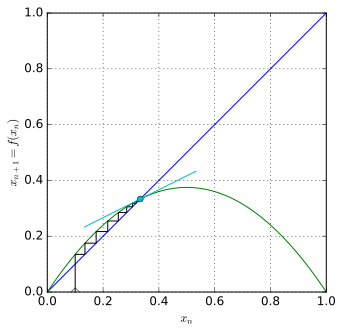

In [23]:
ax = graphical_iteration(I, logistic(1.5), 0.1, final=1, do_slope=True)

**Example ($\lambda=2$, attraction to superstable fixed point):** as we increase the parameter value further, the slope of $f$ at the fixed point reaches zero, giving superstable behaviour (small intervals around the fixed point experience "quadratic shrinkage"). The critical point, $x_c=0.5$, is on the periodic orbit.

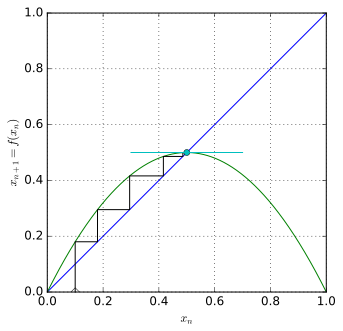

In [24]:
ax = graphical_iteration(I, logistic(2.0), 0.1, final=1, do_slope=True)
plt.savefig('figures/logistic2.png')

**Example ($\lambda=2.8$, attaction to stable fixed point):** Now the slope of $f$ at the fixed point is negative, but still less than $1$ in magnitude, leading to orbits that spiral-in towards the fixed point (with the exception of the orbit having $x_0=0$ which remains a (repelling) fixed point):

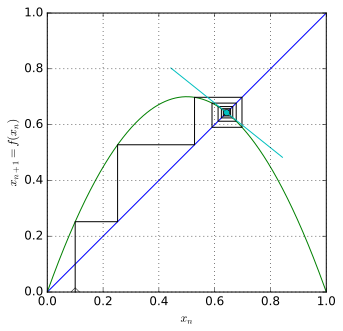

In [25]:
ax = graphical_iteration(I, logistic(2.8), 0.1, final=1, do_slope=True)

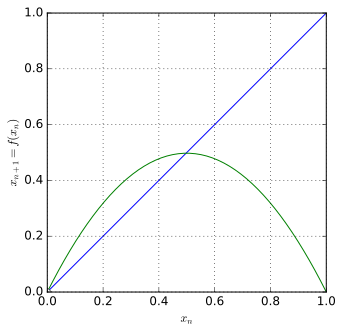

In [26]:
import ipywidgets as ipw
def change_param(a, b, n):
    graphical_iteration(I, logistic(a), b, n=n, final=0, do_slope=False)
_ = ipw.interact(change_param, a=(0,4,0.01), b=(0,1,0.01), n=(10,100,10))

## Period-doubling Bifurcation

**Definition (bifurcation):** We say that a bifurcation occurs, at some particular value of a parameter, if there is a qualitative change in the dynamics, i.e., the structure and stability of orbits, at that parameter value.

For the example quadratic family, above, the fixed point becomes unstable as we increase the parameter $\lambda$ through the value $b_0=3$.  At that paramter value, the slope of the graph of $f$ passes downwards through $-1$ and, thereafter, we have $|f'(x^{*})|>1$ at the fixed point, which means that small neighbourhoods of the fixed point are expanded by the map and orbits starting nearby are repelled away.

The bifurcation that happens at $\lambda=3$ is called a *period doubling bifurcation*: as the fixed point loses stability, it gives rise to 2-cycle. The condition of Negative Schwarzian Derivative ensures that this bifurcation is "supercritical"; as the slope of $f$ passes through $-1$, the slope of $f^2=f\circ f$ passes through $+1$ and $f^2-I$ has a suitable inflexion such that the new $2$-cycle becomes stable at precisely the parameter value at which the original $1$-cycle becomes unstable. The stable 2-cycle corresponds to 2 new (stable) fixed-points of $f^2$.

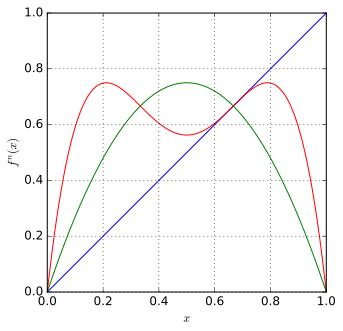

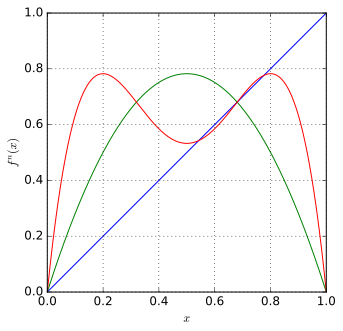

In [27]:
k = 0
f = logistic(3.0) #B[k] is when stable 2**k loses stability.
plt.figure()
ax = plot_map_iterates(I, f, [0, 2**k, 2**(k+1)])
f = logistic(3.13)
plt.figure()
ax = plot_map_iterates(I, f, [0, 2**k, 2**(k+1)])

The stable 2-cycle grows in size.

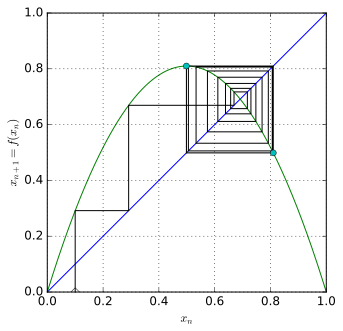

In [28]:
f = logistic(3.24)
ax = graphical_iteration(I, f, 0.1, final=2)
plt.savefig('figures/logistic324.png')

### Bifurcation parameters (handy for later)

> In the numerical experiments that follow, we will need to use some special values of the parameter, $\lambda$, denoted by $b_0,b_1,b_2,\ldots$. The value $b_k$ is called the "$k$-th bifurcation value". The meaning of this will be explained later.

(The locations of some bifurcation parameters have been precomputed and are given below. Note $b_k$ is the point at which a stable $2^k$-cycle bifurcates to a stable $2^{k+1}$-cycle.)

In [29]:
B = [3,
     3.449490,
     3.544090,
     3.564407,
     3.568750,
     3.569690,
     3.569890,
     3.569934,
     3.569943,
     3.5699451,
     3.569945557]

B_infty = 3.569945672

In [30]:
1+math.sqrt(6)

3.449489742783178

### Finding the superstable parameter values

> A second set of special values of the parameter, $\lambda$, will also be needed. These are denoted by $s_0, s_1, s_2,\ldots$, and $s_k$ is called the "$k$-th superstable value".  Again, this will be explained in what follows.

The superstable points lie between successive bifurcation values. They are special values $\lambda$ at which the critical point $x_c$ is a fixed point of the $k$-th iterate ${f_\lambda}^k$.

Below, we find these values using a simple bisection method based on the interval between bifurcation points, plus some error tolerance. First, a general bisection method (presented in a numerically inefficient, but clear, way):

In [31]:
def mid_point(a, b):
    return 0.5*(a+b)

def bisection_step(f, a, b):
    m = mid_point(a, b)
    if f(a)*f(m) <= 0.0:
        return a, m
    else:
        return m, b
    
def bisection(f, a, b, n):
    assert f(a)*f(b) <= 0.0
    for k in range(n):
        a, b = bisection_step(f, a, b)
    return mid_point(a, b)

Now we apply the bisection method to find parameter values for the logistic family that give rise to superstable $2^k$-orbits. Such a parameter value, $s_k$ must be such that $b_{k-1}<s_k<b_k$. In order to avoid the bifurcation values themselves, the initial interval for bisection is based on a sub-interval of $(b_{k-1},b_k)$. The function that we wish to make zero is $E(\lambda):=f_\lambda^{(2^k)}(x_c)-x_c$, i.e., the distance between the critical point, $x_c$, and its $2^k$-th iterate under the map with parameter value $\lambda$. (Before computing the others, we can see quickly that for $k=0$ we are trying to solve ${f_{s_0}}^{2^0}(x_c)=x_c$, i.e., $s_0 (1/2)(1-1/2)=1/2$, giving $s_0=2$.)

In [32]:
def interp(a, b, p):
    return p*b + (1-p)*a

def find_superstable(k):
    a, b = interp(B[k-1], B[k], 0.01), interp(B[k-1], B[k], 0.99)
    def err(lam):
        return iterate(logistic(lam), 2**k)(0.5) - 0.5
    return bisection(err, a, b, 100)

S = [2.0]
for k in range(1, len(B)-1):
    S.append(find_superstable(k))
print(S)

[2.0, 3.23606797749979, 3.498561699327702, 3.5546408627688253, 3.566667379856269, 3.5692435316371114, 3.569795293749946, 3.5699134654223466, 3.5699387742333073, 3.5699441946080572]


### CONTINUED...

At a particular parameter value, it too will become superstable, i.e., the critical point, $x_c=0.5$, will actually be on the period-2 orbit: correspondingly, $f^2$ has two superstable fixed points.

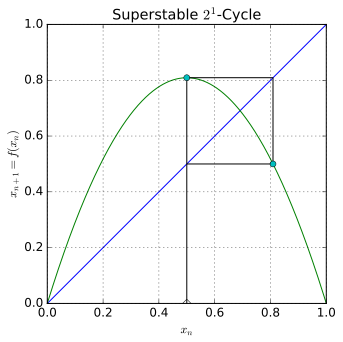

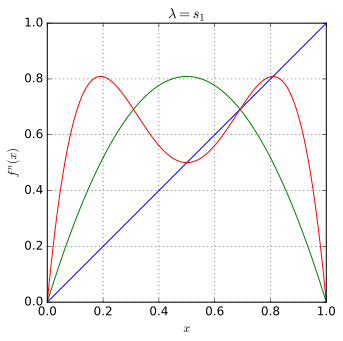

In [33]:
k = 1
f = logistic(S[k])
plt.figure()
ax = graphical_iteration(I, f, 0.5, final=2**k)
ax.set_title('Superstable $2^{%d}$-Cycle'%k)
plt.savefig('figures/logistic_f1.png')
plt.figure()
ax = plot_map_iterates(I, f, [0, 2**(k-1), 2**k])
_ = ax.set_title(r'$\lambda=s_{%d}$'%k)

Just as before, increasing the parameter further will eventually lead to the stable $2^1$-cycle losing stability (slope of $f^2=f^{(2^1)}$ passes downwardsthrough $-1$ at the two fixed points) and, due to negative Schwarzian, the slope of $f^4=f^{(2^2)}$ passes upwards through $+1$ with a suitable inflexion producing a stable $2^2$ orbit. In more technical language: negative Schwarzian derivative ensures that all period doublings are super-critical.

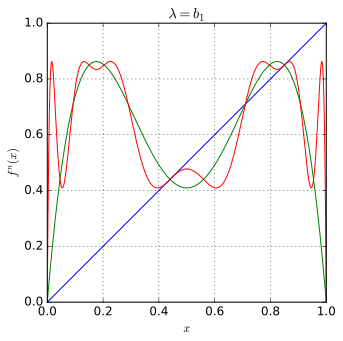

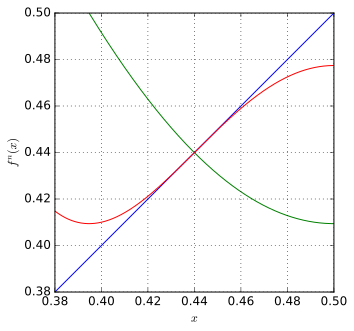

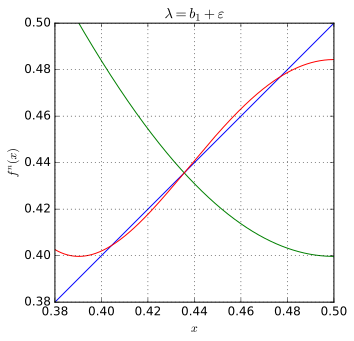

In [34]:
k = 1

f = logistic(B[k])

plt.figure()
ax = plot_map_iterates(I, f, [0, 2**k, 2**(k+1)])
ax.set_title(r'$\lambda=b_{%d}$'%k)

plt.figure()
ax = plot_map_iterates((0.38, 0.5), f, [0, 2**k, 2**(k+1)])
ax.set_title=(r'$\lambda=b_{%d}$'%k)

f = logistic(interp(B[k], B[k+1], 0.2))
plt.figure()
ax = plot_map_iterates((0.38, 0.5), f, [0, 2**k, 2**(k+1)])
_ = ax.set_title(r'$\lambda=b_{%d}+\varepsilon$'%k)

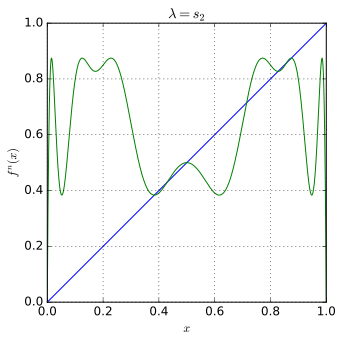

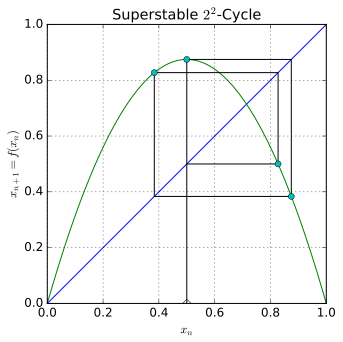

In [35]:
k = 2
f = logistic(S[k])
plt.figure()
ax = plot_map_iterates(I, f, [0, 2**(k)])
ax.set_title(r'$\lambda=s_{%d}$'%k)
plt.savefig('figures/logistic_f2.png')
plt.figure()
ax = graphical_iteration(I, f, 0.5, final=2**k)
_ = ax.set_title('Superstable $2^{%d}$-Cycle'%k)
plt.savefig('figures/logistic_s2.png')

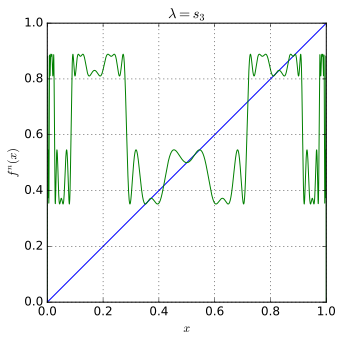

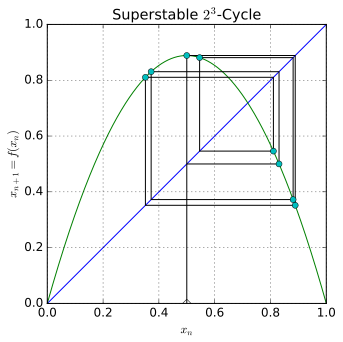

In [36]:
k = 3
f = logistic(S[k])
plt.figure()
ax = plot_map_iterates(I, f, [0, 2**k])
ax.set_title(r'$\lambda=s_{%d}$'%k)
plt.savefig('figures/logistic_f3.png')
plt.figure()
ax = graphical_iteration(I, f, 0.5, final=2**k)
_ = ax.set_title('Superstable $2^{%d}$-Cycle'%k)
plt.savefig('figures/logistic_s3.png')

## Bifurcation diagram for the Period-Doubling Cascade

In [38]:
def final_iterate(f, x0, n):
    x = x0
    for k in range(n):
        x = f(x)
    return x

def bifurcation_diagram():
    # s[k] gives superstable 2**k orbit.
    # b[k] gives parameter at which it gives rise to stable 2**(k+1).
    figsize = matplotlib.rcParams['figure.figsize']
    fig = plt.figure(figsize=(1.5*figsize[0],figsize[1]))
    ax = fig.gca()
    b = [1.75]+list(B[:-1])
    for k, (b0, b1) in enumerate(zip(b[:5], b[1:6])):
        start, end = interp(b0, b1, -0.05), interp(b0, b1, 0.999)
        x0 = numpy.linspace(start, end, 101)
        for j in range(2**k):
            y = [final_iterate(logistic(x), 0.5, 200+j) for x in x0]
            ax.plot(x0, y)
    ax.axhline(0.5, color='k', label='$x_c$')
    for k, S_k in enumerate(S):
        ax.axvline(S_k, linestyle=':')
        if k < 3:
            ax.annotate('$s_{%d}$'%k, xy=(S_k, 0.325))
    ax.set_xlim(1.75, B_infty)
    ax.set_xlabel(r'$\lambda$')
    ax.set_ylabel(r'$x_\infty$')
    return ax

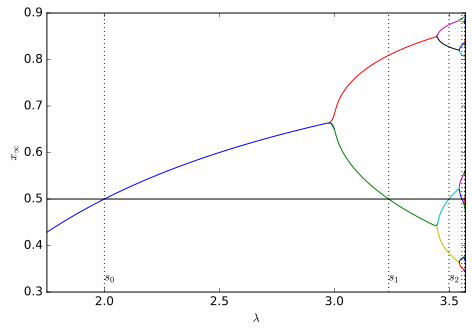

In [39]:
ax = bifurcation_diagram()

### Estimation of the constant $\delta=4.66920\ldots$

In [40]:
for k in range(len(S)-3):
    delta_k = (S[k+1]-S[k]) / (S[k+2]-S[k+1])
    print(k, delta_k)

0 4.708943013540497
1 4.680770998010707
2 4.6629596111141085
3 4.668403925917214
4 4.668953740964352
5 4.669157181473023
6 4.6691910016495255


Let's plot the bifurcation diagram in a different way by plotting normalised histogram of box occupation along the later part of an orbit, for each value of the parameter.

### What about the rest of the parameter space? The Full Bifurcation Diagram

In [41]:
from IPython.display import Image
import scipy.misc

In [44]:
def bifurcation_image(family, p_min, p_max, w, h, n_trans=1000, n_keep=1000,
                      filename='temp.png', I=(0,1)):
    a, b = I
    image = numpy.zeros((h+1, w+1), dtype=float)
    for k in range(w+1):
        col = k
        f = family(interp(p_min, p_max, col/float(w)))
        x = xc
        for k in range(n_trans):
            x = f(x)
        for k in range(n_keep):
            x = f(x)
            if a <= x <= b:
                h_x = int(h*(x-a) / float(b-a))
                image[h_x, int(col)] = -2
    scipy.misc.imsave('figures/'+filename, image)

In [45]:
aspect = 16.0/9.0
h = 2000
w = int(aspect*h)

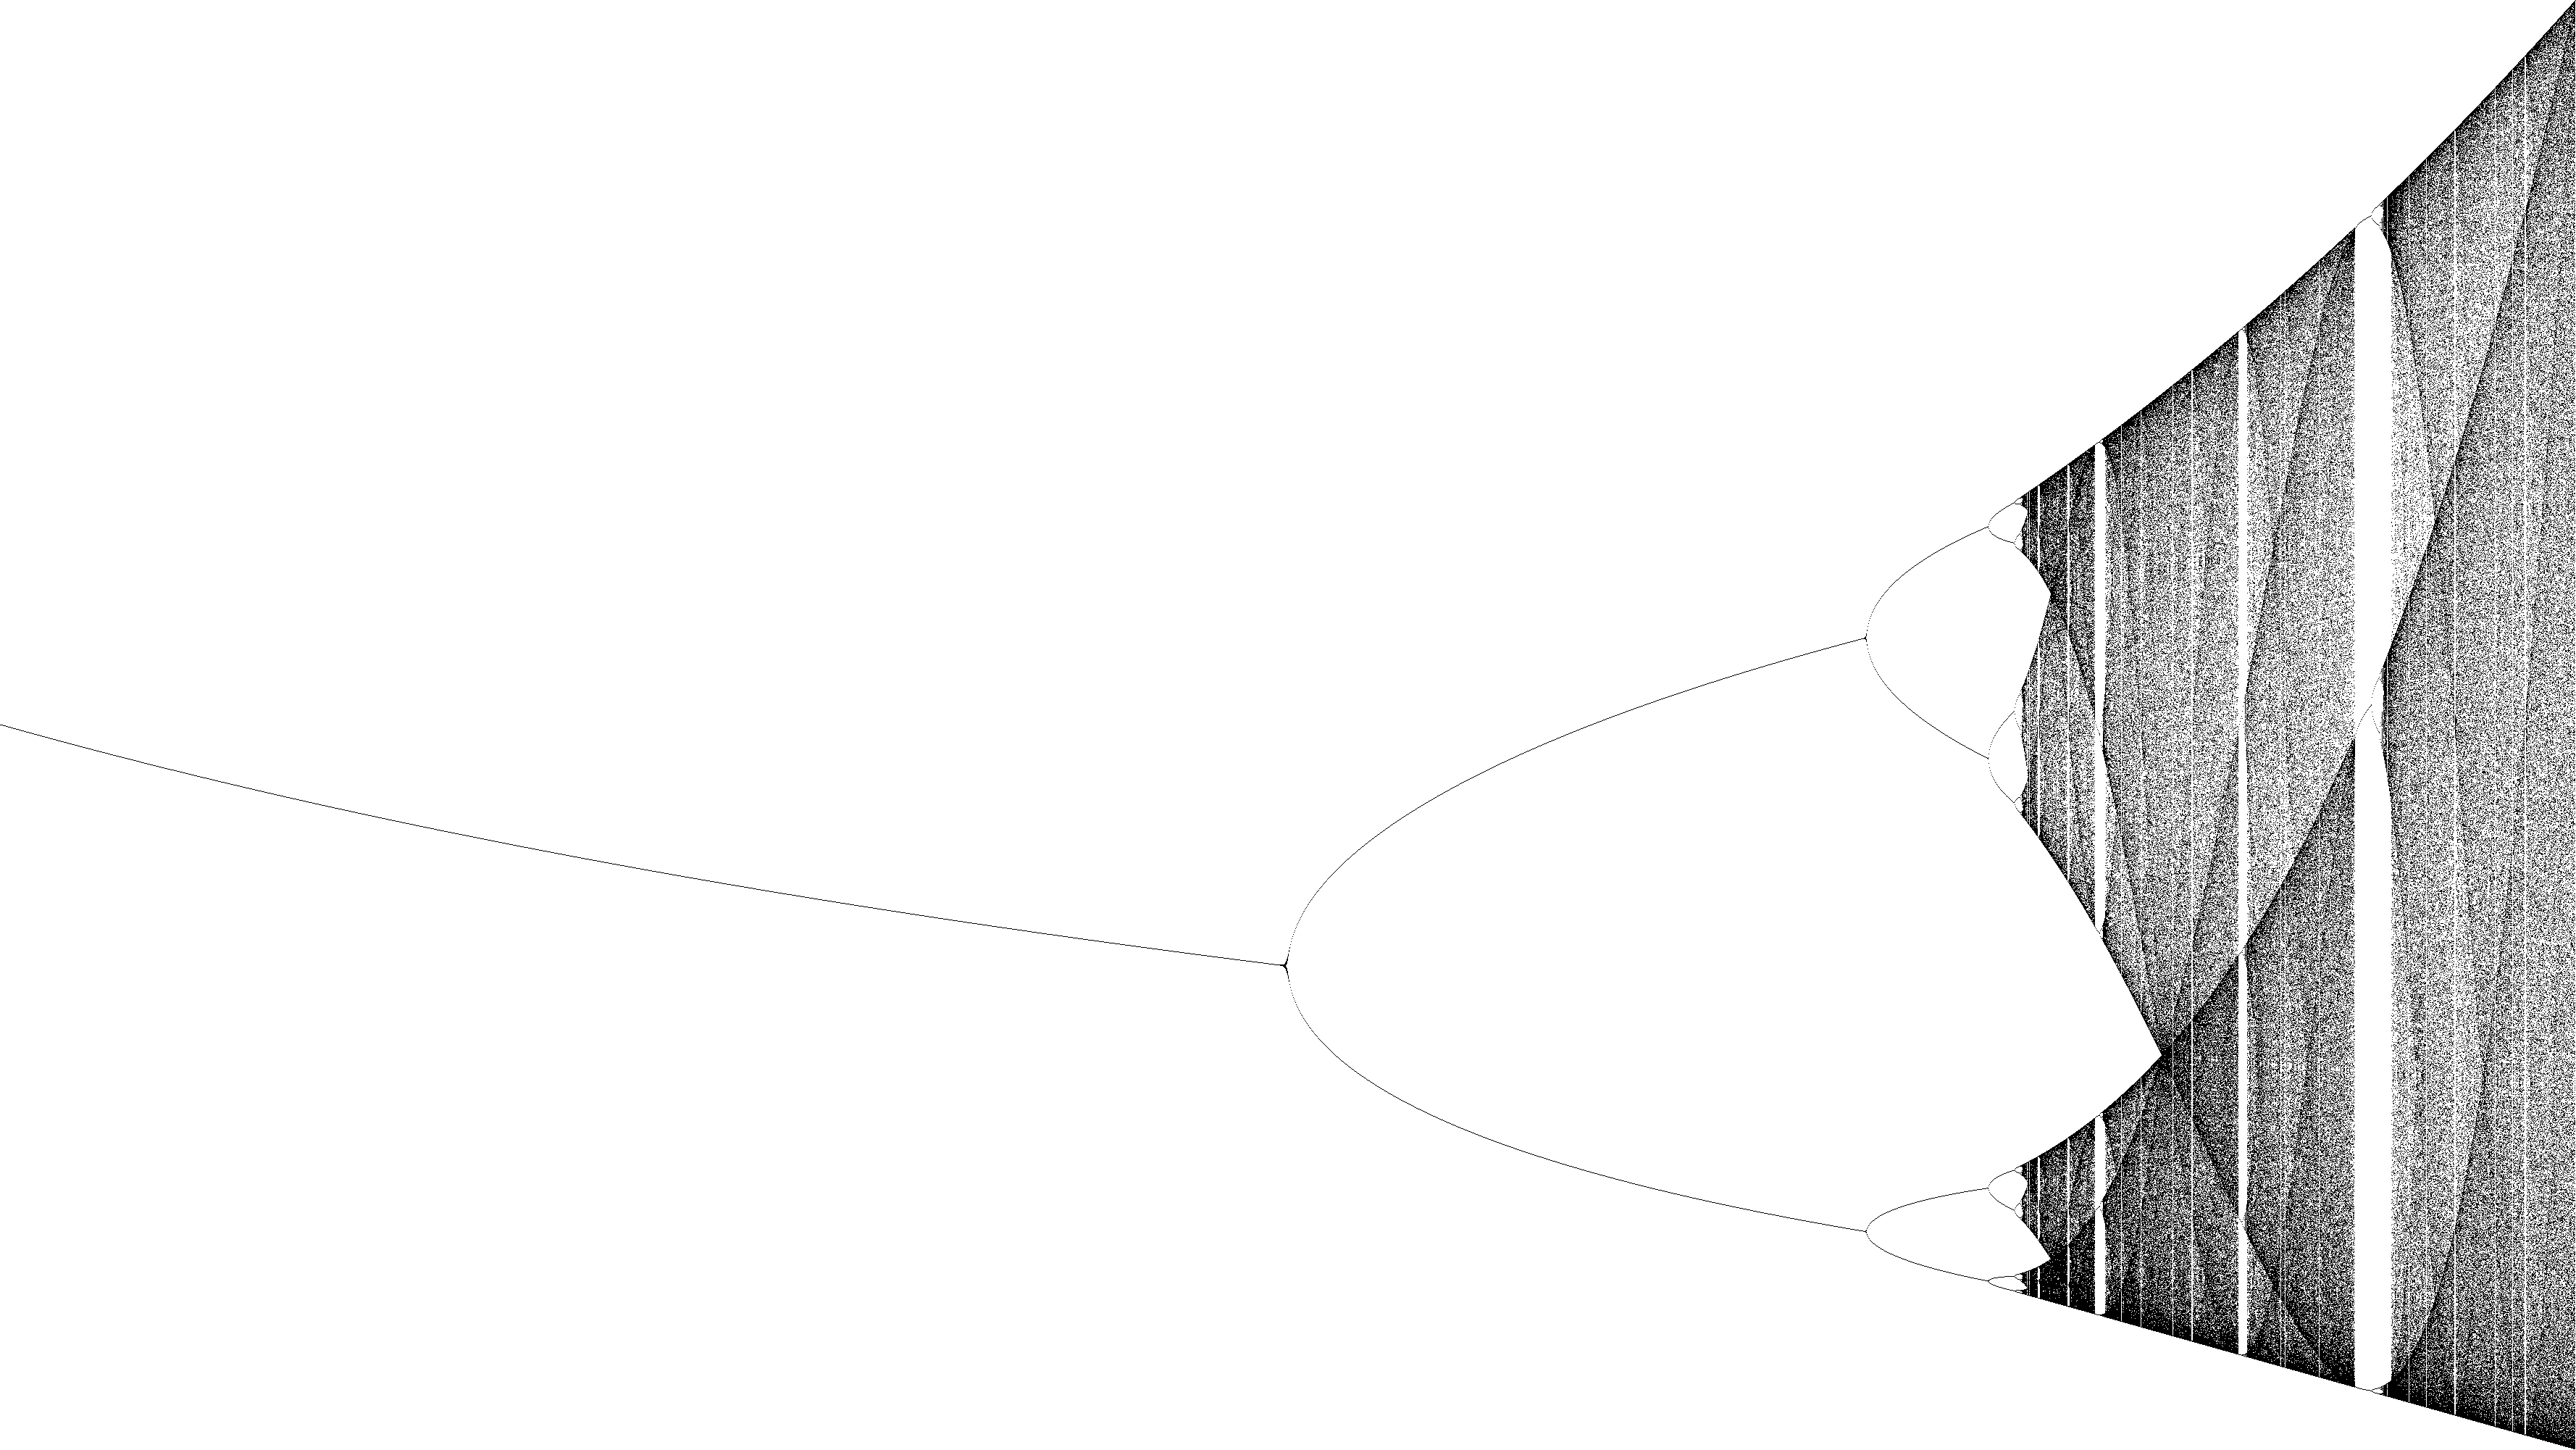

In [46]:
bifurcation_image(logistic, S[0], 4.0, w, h, filename='bif1.png')
Image(filename='figures/bif1.png')

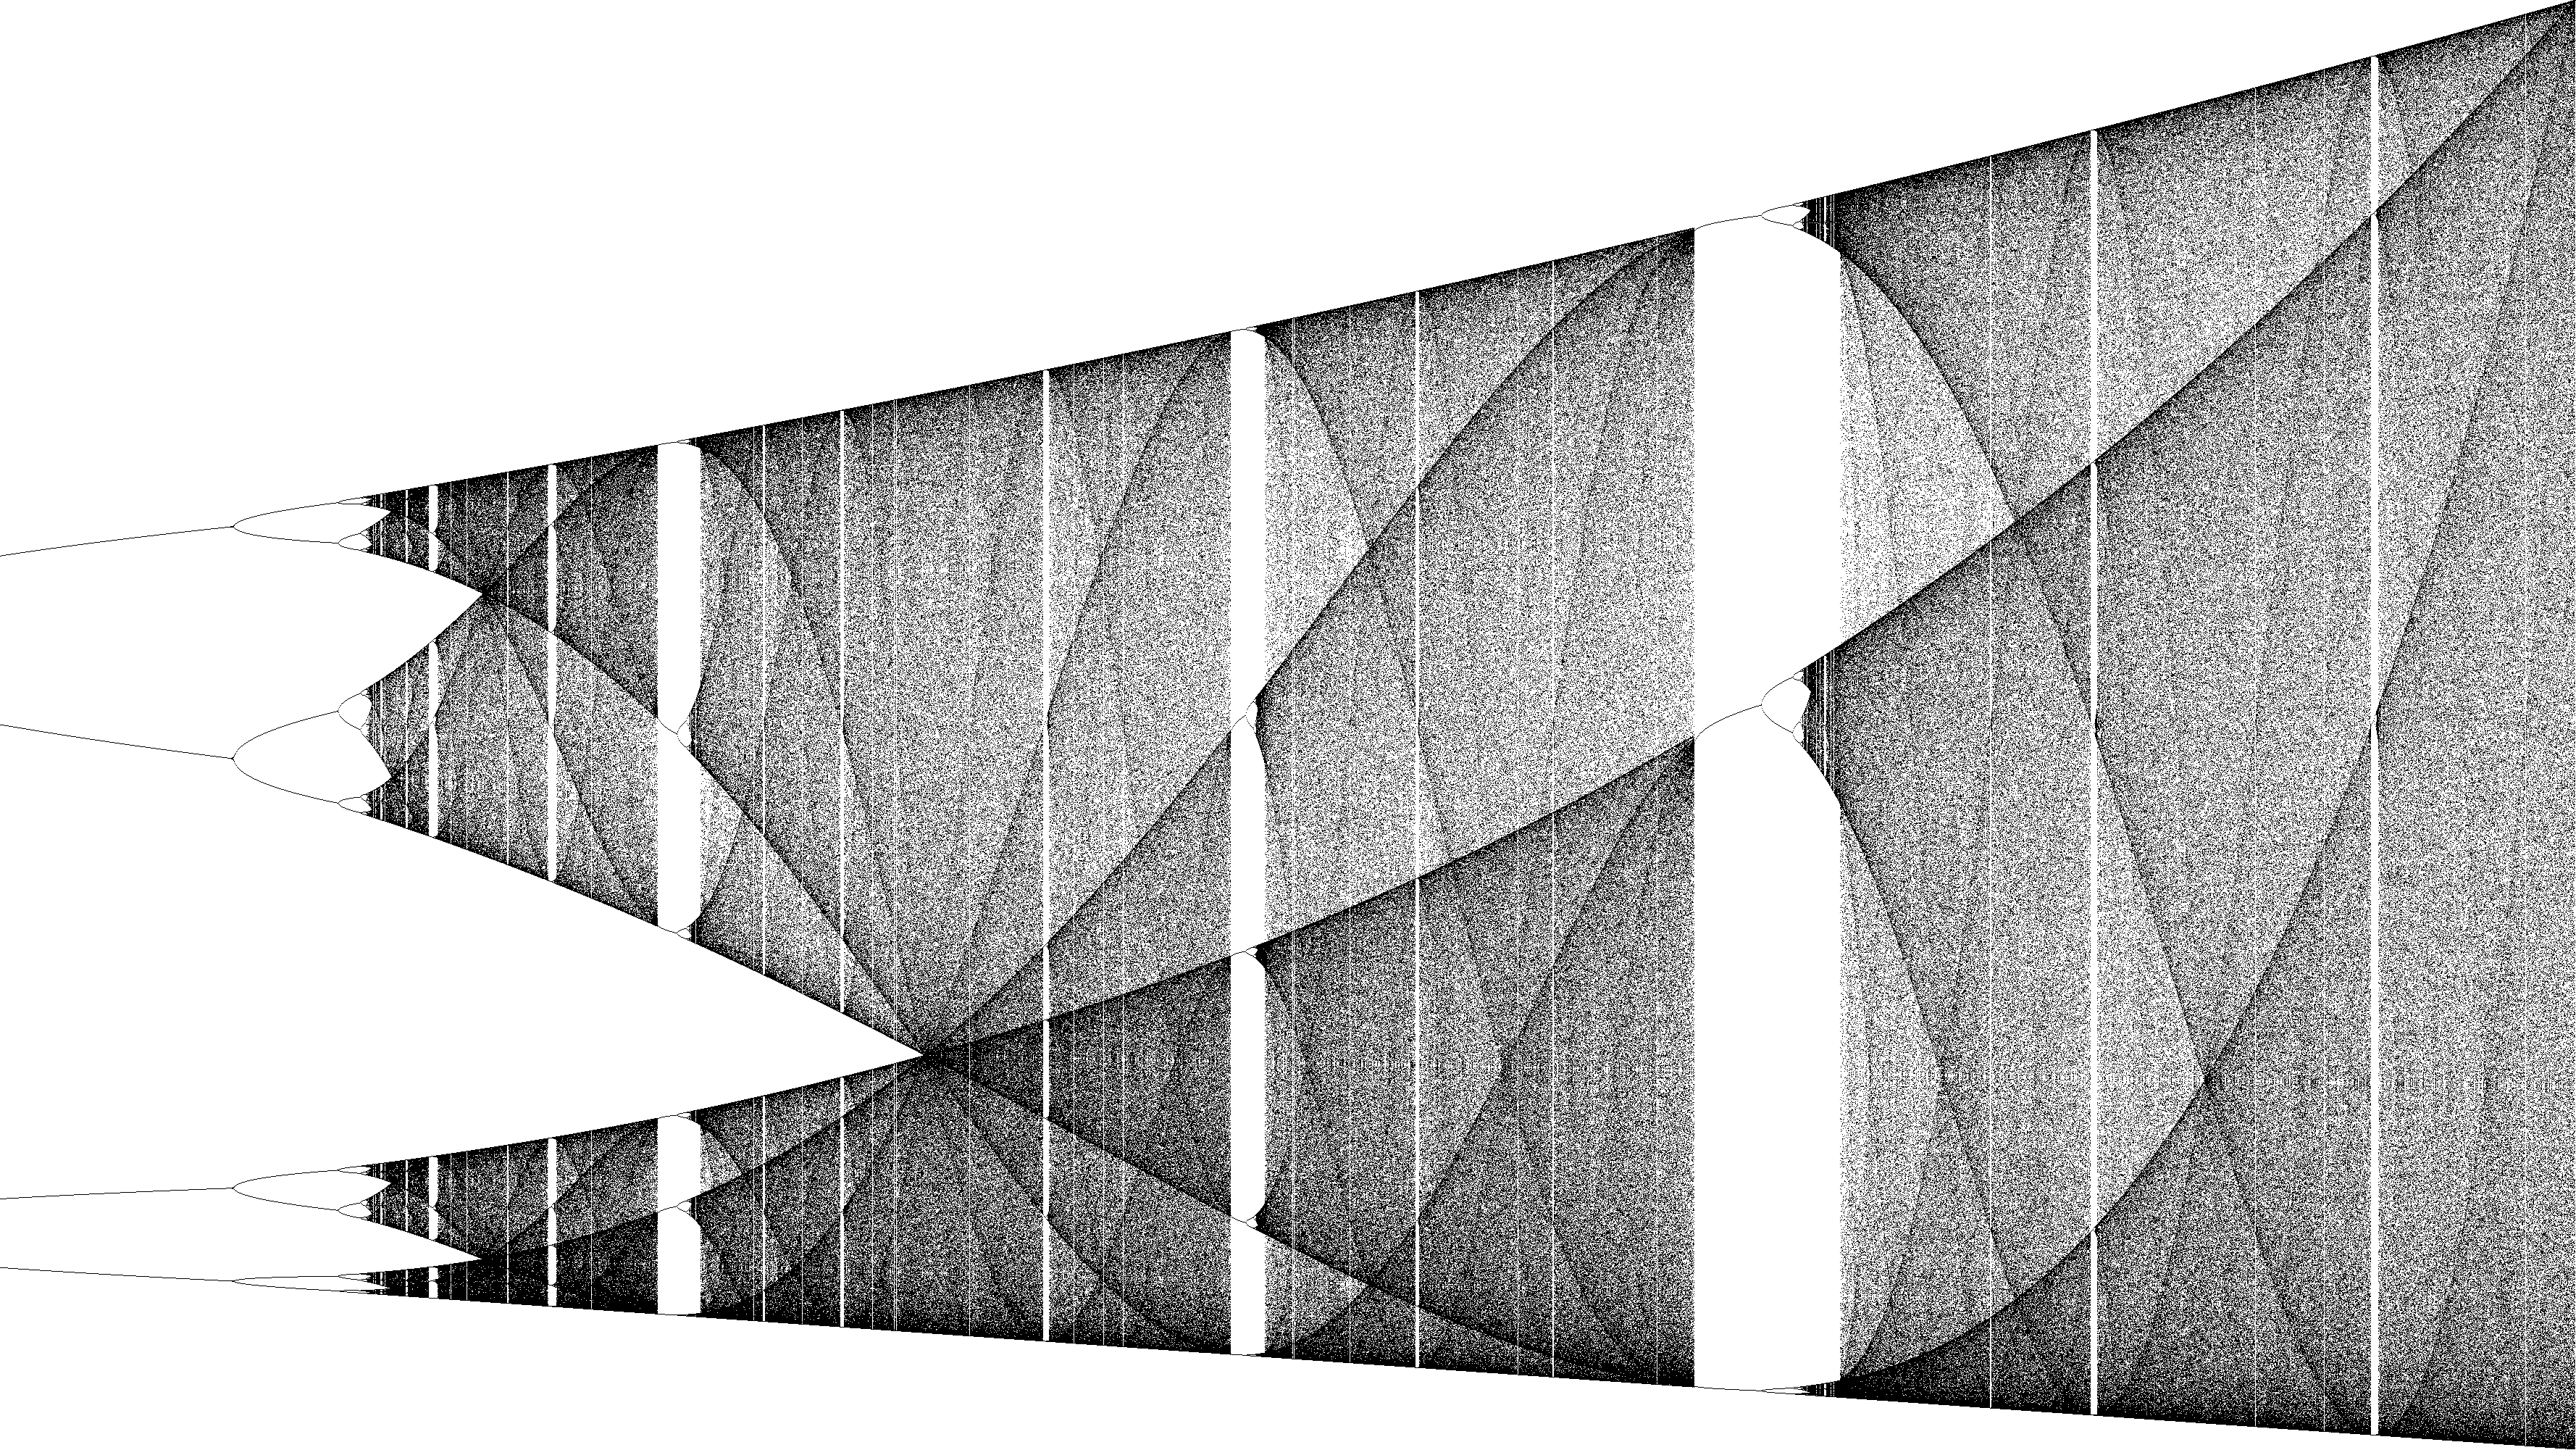

In [47]:
bifurcation_image(logistic, S[2], 4.0, w, h, filename='bif2.png')
Image(filename='figures/bif2.png')

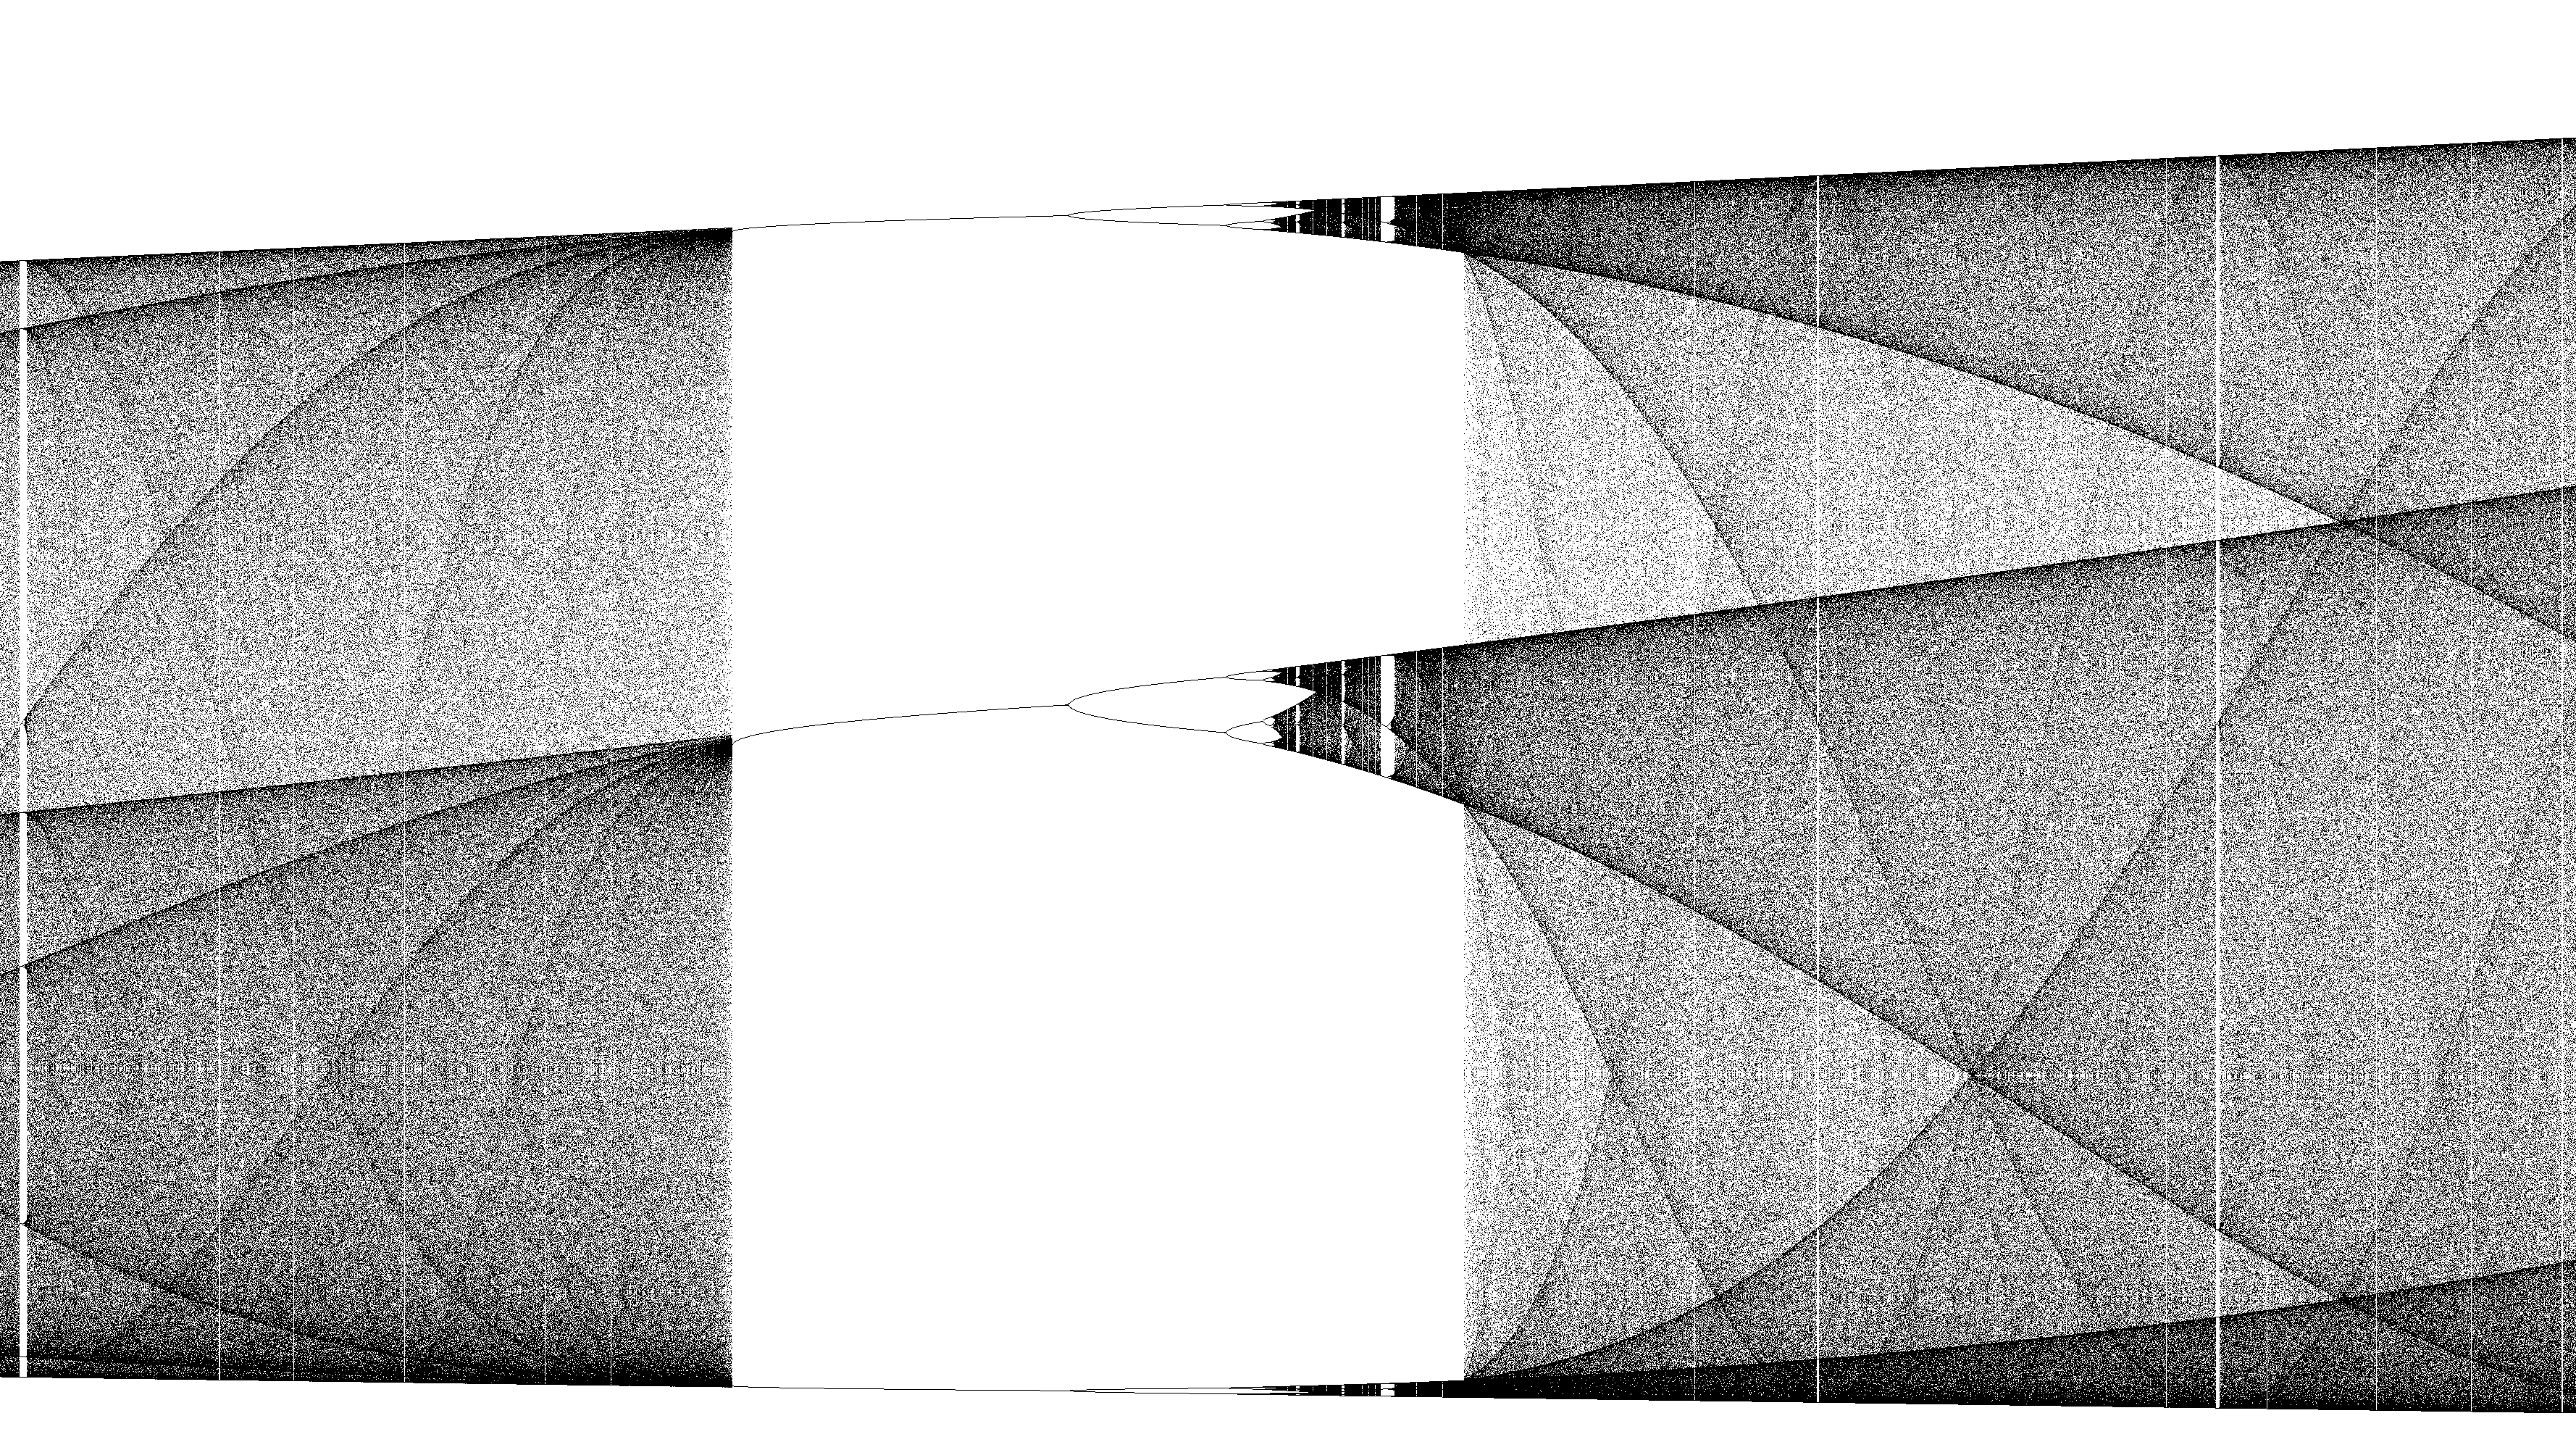

In [48]:
bifurcation_image(logistic, 3.8, 3.9, w, h, filename='bif3.png')
Image(filename='figures/bif3.png')

### Zoom on the birth of the period-$3\cdot 2^n$ period-doubling cascade

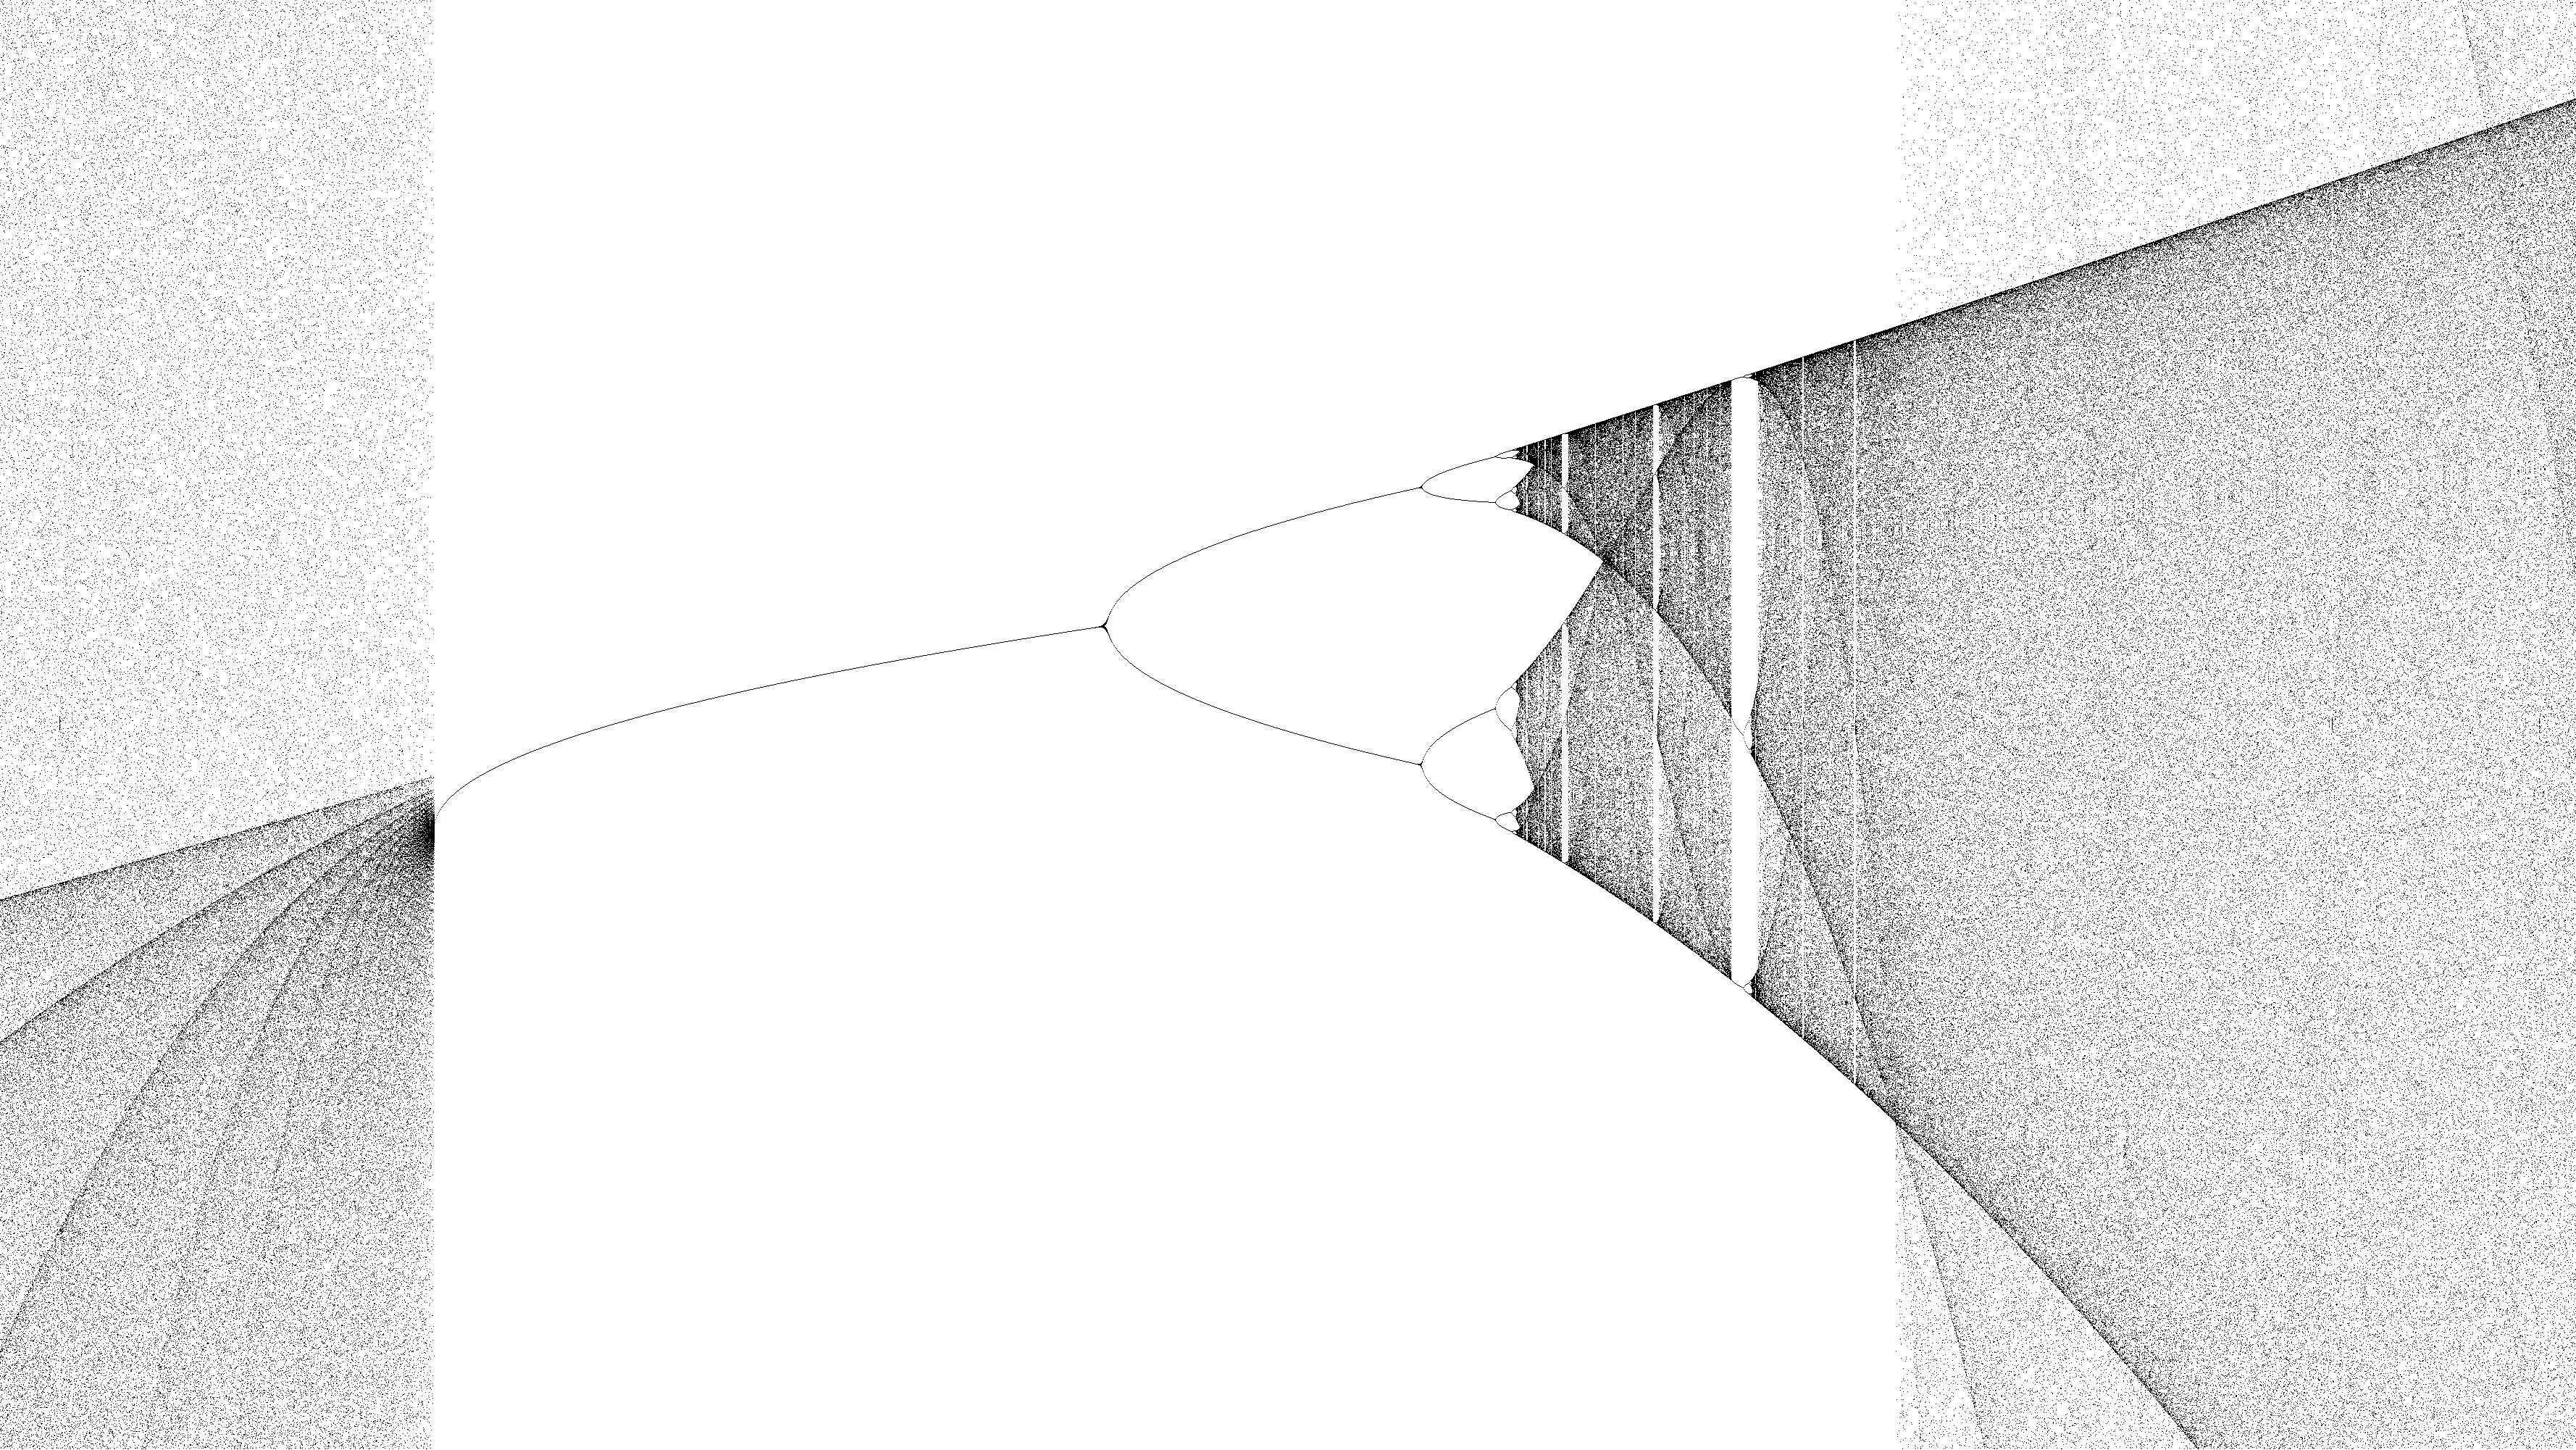

In [50]:
bifurcation_image(logistic, 3.82, 3.87, w, h,
                  filename='bif4.png',I=(0.4,0.6))
Image(filename='figures/bif4.png')

# Part B. Renormalisation explanation for the asymptotic self-similarity in the Period-Doubling Cascade

### The Renormalisation Operator

Restrict to a space of maps with $f(0)=1$. Consider $(Tf)(0)=-\alpha f(f(0))=-\alpha f(1)$. Thus, we need $1=-\alpha f(1)$, which gives $\alpha=-1/f(1)$.

In [51]:
def T(f):
    alpha = -1.0/f(1.0)
    def Tf(x):
        return -alpha*f(f(-x/alpha))
    return Tf

### A convenient family of quadratic maps

Note that our original logistic map $f_\lambda:x\mapsto\lambda x(1-x)$ does not satisfy this condition.  We need to conjugate it to a suitable map.  We want, e.g., $1-\mu x^2 = C^{-1}f(C(x))$.

In [52]:
def logistic2(mu):
    def f_mu(x):
        return 1 - mu*x**2
    return f_mu

Note: applying the renormalisation operator to a map at the accumulation point of the period-doubling cascade for a family (which is in the stable manifold of the fixed point) is a way to approximate the fixed point itself.

In [53]:
alpha_infty = 2.502907875095892822283902873218

### Applying the renormalisation operator to a family at $\mu=s_\infty$

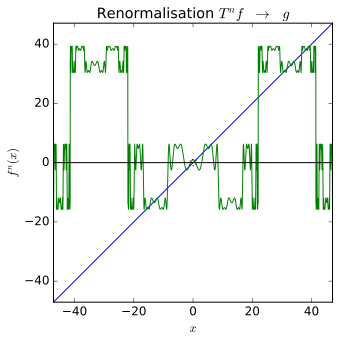

In [54]:
mu_infty = 1.40115518909206365
n = 4
Tnf = iterate(T, n)(logistic2(mu_infty))
r = 1.2*alpha_infty**n
ax = plot_map_iterates((-r, r), Tnf, [0, 1], n_points=5001)
ax.set_title(r'Renormalisation $T^nf\quad\to\quad g$')
ax.grid(False)
ax.axhline(0.0, color='k', linestyle='-')
for k in range(0, 1, 1):
    a = alpha_infty**k
    lines = ax.plot([-a,-a,a,a,-a],[-a,a,a,-a,-a], color='k', linestyle=':')
plt.savefig('figures/logistic_finf.png')

We have taken a simple quadratic family $f_\mu$ at the accumulation $\mu=s_\infty$ of its period-doubling cascade, and have applied the renormalisation operator a number of times to this map $f$.  Since the original map is (give or take numerical accuracy) in the stable manifold of the renormalisation fixed point, $g$, the iteration approaches (at least, at first) the universal function, $g$.  Notice that, with each application of the renormalisation operator, the rescaling via $\alpha$, chosen to impose the normalisation condition $g(0)=1$, ensures that we gain a function $T^nf$, defined on ever larger symmetric intervals of the real line. The limit, $T^nf\to g$, we gain a universal function, defined on the whole of the real line.

### Composition without rescaling applied to a function at $\mu=s_\infty$

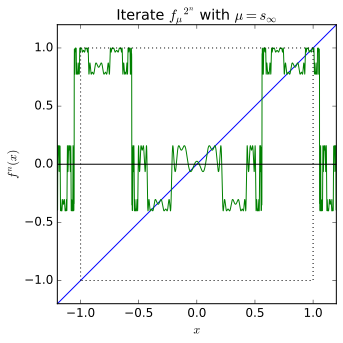

In [55]:
n = 4
f = iterate(logistic2(mu_infty), 2**n)
r = 1.2
ax = plot_map_iterates((-r, r), f, [0, 1], n_points=500*1.75**n)
ax.set_title(r'Iterate ${f_\mu}^{2^n}$ with $\mu=s_\infty$')
ax.plot([-1,-1,1,1,-1], [-1,1,1,-1,-1], color='k', linestyle=':')
ax.axhline(0.0, color='k')
_ = ax.grid(False)

We take the original function, $f_\mu$, with $\mu=s_\infty$ and simply form the iterate ${f_\mu}^{2^n}$.

### Observations

As we examine ever higher values of $n$, while simply iterating the function:

* The iterates ${f_\mu}^{2^n}$ of the original function, with $\mu={s_\infty}$, defined on the interval $I=[-1,+1]$, contain finer and finer detail (on ever-smaller scales),
* Each time we iterate, moving from $f^{2^n}$ to $f^{2^{n+1}}$, we simplify, in the sense that period $2$ orbits map to fixed points (in general period $2^{n+1}$-orbits map to period $2^n$-orbits).
* We observe asymptotic self-similarity in that a small piece of $f^{2^{n+1}}$ more and more closely resembles $f^{2^n}$.

And as we renormalise:

* Each application of the renormalisation operator, $T$, in addition to iterating $f$, also rescales it so that the "small part" mentioned above fits (approximately) over the original $f$, with the "fit" becoming more exact for higher $n$.
* The iterates of the renormalisation operator $T$ applied to $f$ yield functions $T^nf$, with scale $f(0)=1$, but defined on larger and larger intervals $[-\alpha^n,+\alpha^n]$ of the real line.

In the limit $n\to\infty$:

* The functions $T^nf$ converge to the universal renormalisation fixed point function, $g$, defined on the whole real line, with scale $g(0)=1$ (a quadratic local maximum). The detail in $g$ is in a sense "on the outside".
* Zooming-in to examine the finer and finer detail ("on the inside") in the iterates ${f_\mu}^{2^n}$ becomes "equivalent" to simply looking at the universal function, $g$.
* In particular, $g$ captures the asymptotic (state space) scaling (a) via the constant $\alpha=-1/g(1)$ and (b) via its invariance under iteration and rescaling. In this sense (invariance under iteration and rescaling), $g$ is exactly self-similar.

Thus the universal function captures the asymptotic scaling behaviour observed in the period-doubling cascade of the original family, $f_\mu$.

### TODO

Note: on the above, or a separate diagram, we could actually show the iterate of $g$, $g\circ g$, near the origin, so as to demonstrate rescaling to fit the iterate exactly over $g$.

### Conjectures

* Restrict to a space of maps that all have quadratic maximum at the origin.
* Consider sheets of functions having a superstable $2^n$ orbit (i.e., for which the critical point, at the origin, lies on a periodic orbit of period $2^n$).
Suppose:
* We consider a one-parameter family of maps in the space; it forms a curve segment in the space.
* Suppose that such a family displays a period-doubling cascade (starting with a $2^m$ orbit for some $m$).
Then:
* A "generic" family crosses the stable manifold of the renormalisation fixed point transversally.
* It therefore crosses the surfaces corresponding to superstable $2^n$ orbits for all high enough $n$.
* (Provided that the crossing point is close enough to the fixed point $g_\infty$) the asymptotic rate of accumulation of period doublings for the family will be determined by the eigenvalue $\delta$ corresponding to the 1-dimensional unstable manifold of $g_\infty$.

----------cut here--------------cut here--------------cut here---------------

# Part C. Finding the renormalisation fixed point

### The function space

We can approximate the renormalisation fixed point, by working in a suitable space of polynomials.

In [1]:
import numpy.polynomial.polynomial as poly

Here, we take an approximation to the simple quadratic family $f_\mu:x\mapsto 1-\mu x^2$ at the accumulation of the period-doubling cascade of $2^n$ orbits, $\mu=s_\infty$:

In [2]:
mu_infty = -1.4011551890920506
p = poly.Polynomial([1.0, 0.0, mu_infty])
print(p)

poly([ 1.          0.         -1.40115519])


We implement the renormalisation operator, using polynomials:

In [45]:
X = poly.Polynomial([0.0, 1.0])
def _T(f):
    alpha = -1/f(1)
    return -alpha*f(f((-1/alpha)*X))

In [46]:
print(_T(p))

poly([ 1.          0.         -1.57512451  0.          0.17758078])


**Definition ($l^1$-norm):** We put a norm on our space of functions, by taking the $l^1$-norm which, for a function:

\begin{equation}
f(x) = \sum_{k=0}^\infty f_k x^k,
\end{equation}

is defined by

\begin{equation}
\|f\|_1 = \sum_{k=0}^\infty |f_k|.
\end{equation}

In [47]:
def norm_1(p):
    return sum(abs(p.coef))

In [48]:
print(norm_1(_T(p) - p))

0.351550100308


### Non-rigorous numerical Newton method

The derivative of the renormalisation operator itself is not contractive at the fixed point (it has a single unstable direction, corresponding to an eigenvalue $\delta>1$). Thus, iterating the operator itself will not lead to convergence to the fixed point function, $g$.

However, we can implement Newton's method for our fixed-point problem.

**Definition (truncation degree):** We fix an integer, $N$, and work in the vector space formed by polynomials of degree up to $N-1$, together with the norm defined above.

In [7]:
N = 81

**Definition (basis):** As a basis for the space, it is enough to choose the pure powers (monomials) $e_k=x^k$:

In [10]:
import numpy

def monomial(N, k):
    coeffs = numpy.zeros(N, dtype=float)
    coeffs[k] = 1.0
    e_k = poly.Polynomial(coeffs)
    return e_k

In [11]:
print(monomial(5, 3))

poly([ 0.  0.  0.  1.  0.])


### Approximating the derivative of the renormalisation operator

It can be shown that the derivative, $D(T)$, of the renormalisation operator, $T$, is a compact operator, and we can approximate it by a finite-dimensional matrix, $L$. The elements of $L$ are found via:

\begin{equation}
L_{jk}
= \frac{\left[T(f+\delta f_k)-T(f)\right]_j}{\|\delta f_k\|}
= \frac{\left[T(f+he_k)-T(f)\right]_j}{h},
\end{equation}

where $h>0$ is chosen to be a small floating-point number.

In [12]:
def D(T, h = 1.0e-12):
    def DT(F):
        L = numpy.zeros((N, N), dtype=float)
        for k in range(0, N, 1):
            e_k = monomial(N, k)
            delta_Fk = h*e_k
            delta_Tk = (T(F + delta_Fk) - T(F))/h
            for j in range(0, min(N, len(delta_Tk.coef)), 2):
                L[j, k] = delta_Tk.coef[j]
        return L
    return DT

Note: in the above, suppressing the contribution from the constant term will result in a zero eigenvaue. Leaving the contribution from the constant term present will result in an eigenvalue $\alpha^2>1$.

In [13]:
L = D(_T)(p)
print(L)

[[  6.98641145e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.35189646e+00   4.48951987e+00   6.17572660e+00 ...,   4.77697881e+01
    4.83315610e+01   4.88940000e+01]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   4.00737270e-03
    7.91456109e-03   1.54430460e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,  -8.80999008e-04
   -1.78458773e-03  -3.56917547e-03]]


**Definition (approximate Newton's method for fixed-points):**
Given an operator, $T$, acting on functions, $f$, we define the Newton operator via:

\begin{equation}
N:
f \mapsto f - [DT(f)]^{-1}[T(f)].
\end{equation}

Notice that the fixed points of the above operator are zeroes of $T$.
We can adapt the above operator to one suitable for finding fixed points of $T$, rather than zeroes, by noting that fixed points are themselves zeroes of $T-I$:

\begin{equation}
M:
f \mapsto f - [DT(f)-I]^{-1}[T(f)-f].
\end{equation}

Finally, we use an approximation $L$ to the derivative $DT(f)$:

\begin{equation}
\Phi:
f \mapsto f - [L - I]^{-1}[T(f) - f].
\end{equation}

Note that the above operator, $\Phi$, has the same fixed points as $T$. However, unlike for the original operator, $T$, our renormalisation fixed point turns out to be a stable fixed point for this new operator. Thus, we can iterate this adapted Newton method, $\Phi$, on an initial guess $f$, and hope for convergence to the fixed point, $g$ of $T$.

In [14]:
I = numpy.identity(N)

def project_to_even_subspace(P):
    for k in range(1, len(P.coef), 2):
        P.coef[k] = 0.0
    return P

def truncate_poly(P):
    n = len(P.coef)
    if n == N:
        return P
    elif n > N:
        return P.truncate(N)
    else:
        c = numpy.zeros(N, dtype=float)
        c[:n] = P.coef
        return poly.Polynomial(c)

def _newton(T, F0, n):
    F = F0
    for k in range(n):
        L = D(_T)(F) - I
        L_inv = numpy.linalg.inv(L)
        residue = truncate_poly(T(F) - F)
        print(norm_1(residue))
        F = project_to_even_subspace(F - numpy.dot(L_inv, residue.coef))
    return F

In [15]:
g_found = _newton(_T, p, 10)

0.351550100308
0.0480923608945
0.000185614876803
2.10692198414e-08
3.574162138e-12
1.07733030214e-15
2.37710146085e-16
1.11979204874e-15
2.45604947586e-16
5.62663919967e-16


In [16]:
print(norm_1(_T(g_found) - g_found))

5.72267236372e-16


### Comparison with the literature

For comparison, we show coefficients obtained via the web:

In [17]:
C2=[1,
-1.527632997036301454035890310240,
+0.104815194787303733216742613801,
+0.026705670525193354032652094944,
-0.003527409660908709170234190769,
+0.000081600966547531745172190486,
+0.000025285084233963536176262552,
-2.5563171662784938463532541E-6,
-9.6512715508912032163725768E-8,
+2.8193463974504091370756629E-8,
-2.77305116079901172437E-10,
-3.02842702213056632983E-10,
+2.67058928074807555396E-11,
+9.96229164102848231059E-13,
-3.62420298290415608455E-13,
+2.17965774482707047701E-14,
+1.52923289948096260560E-15,
-3.184728789952775E-16,
+1.134672106211871E-17,
+1.881676056825439E-18,
-2.275612564632121E-19,
-9.822447629421762E-22,
+2.064129756004508E-21,
-1.249320059243689E-22,
-1.0770612046E-23,
+1.8727468082E-24,
-2.5777082101E-26,
-1.5541904560E-26,
+1.2804434650E-27,
+5.5850587986E-29,
-1.5278346925E-29,
+5.0417426639E-31,
+1.0165368070E-31,
-1.00690E-32,
-5.24253E-34,
+1.72437E-34,
-1.31439E-35,
-1.85830E-38,
+8.05506E-38,
-6.26717E-39,
+1.76882E-40]

In [18]:
C = numpy.zeros(2*len(C2)-1, dtype=float)
for k in range(len(C2)):
    C[2*k] = C2[k]
g = poly.Polynomial(C)
print(g)

poly([  1.00000000e+00   0.00000000e+00  -1.52763300e+00   0.00000000e+00
   1.04815195e-01   0.00000000e+00   2.67056705e-02   0.00000000e+00
  -3.52740966e-03   0.00000000e+00   8.16009665e-05   0.00000000e+00
   2.52850842e-05   0.00000000e+00  -2.55631717e-06   0.00000000e+00
  -9.65127155e-08   0.00000000e+00   2.81934640e-08   0.00000000e+00
  -2.77305116e-10   0.00000000e+00  -3.02842702e-10   0.00000000e+00
   2.67058928e-11   0.00000000e+00   9.96229164e-13   0.00000000e+00
  -3.62420298e-13   0.00000000e+00   2.17965774e-14   0.00000000e+00
   1.52923290e-15   0.00000000e+00  -3.18472879e-16   0.00000000e+00
   1.13467211e-17   0.00000000e+00   1.88167606e-18   0.00000000e+00
  -2.27561256e-19   0.00000000e+00  -9.82244763e-22   0.00000000e+00
   2.06412976e-21   0.00000000e+00  -1.24932006e-22   0.00000000e+00
  -1.07706120e-23   0.00000000e+00   1.87274681e-24   0.00000000e+00
  -2.57770821e-26   0.00000000e+00  -1.55419046e-26   0.00000000e+00
   1.28044346e-27   0.0000000

In [19]:
norm_1(_T(g)-g)

2.5024664705712391e-16

In [20]:
print(g.degree())

80


In [21]:
norm_1(g_found - g)

7.6537142728958438e-17

In [23]:
g_found_even = g_found.coef[::2]
g_even = g.coef[::2]

### Relative differences in even coefficients compared to fixed point in literature

In [24]:
abs((g_found_even - g_even)/g_even)

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         2.46837060e-15,   2.95070373e-15,   3.32165849e-16,
         6.56586532e-15,   5.63293174e-15,   1.54958084e-14,
         1.00927694e-14,   7.45731475e-15,   1.38276466e-14,
         1.27040613e-14,   2.02712788e-14,   1.61594243e-14,
         1.30291064e-14,   2.50189189e-14,   1.62553864e-14,
         1.39182284e-13,   1.18236838e-12,   1.10527084e-11,
         2.67489881e-09,   1.20799364e-09,   1.71653358e-08,
         1.54967291e-07,   6.27927153e-07,   2.89894332e-05,
         2.74973861e-05,   1.71192577e-04,   1.79743944e-03,
         2.67139213e-03,   2.90026708e-02,   4.49695471e-02,
         1.22206114e-01,   5.33564818e-01,   3.02131424e-01,
         5.72304329e-01,   3.96370903e+01,   2.95341270e-01,
         9.67707522e-01,   6.12745976e+00])

### The spectrum of the (approx) derivative of the renormalisation operator at the (approx) fixed point

In [26]:
L = D(_T)(g_found)
L = L[::2,::2]  #restrict to the even subspace
print(numpy.shape(L))

(41, 41)


In [28]:
eigenvalues, eigenfunctions_as_cols = numpy.linalg.eig(L)
for k in range(len(eigenvalues)):
    v = eigenvalues[k]
    x = eigenfunctions_as_cols[:,k]
    l1_error = sum(abs(numpy.dot(L, x)-v*x))
    print(k, abs(v), l1_error)

0 6.26526297353 6.60875692659e-15
1 4.67016934985 3.66486360569e-15
2 0.159376049359 7.44434308856e-15
3 0.123512357756 6.4181130399e-15
4 0.0570641770697 5.94520143728e-15
5 0.159256737561 1.04246790626e-07
6 0.0254184176986 4.353027899e-15
7 0.0101063364884 1.28261427939e-14
8 0.00404824410905 1.83394608724e-14
9 0.0016191788881 3.11417064235e-14
10 0.00188922487803 2.67755223079e-08
11 0.000652405151506 4.92784456434e-14
12 0.000267441251546 7.25865969952e-14
13 0.000115048167707 1.16720717254e-13
14 5.24040335761e-05 1.62002347039e-13
15 4.62707771688e-05 1.11027101137e-08
16 2.50801704117e-05 2.44341709896e-13
17 1.17407076981e-05 4.49702428345e-13
18 5.15166141895e-06 4.90838377129e-13
19 2.11556333012e-06 1.24900522234e-12
20 1.75820756934e-06 4.12829121841e-09
21 8.31618021697e-07 4.44963385805e-12
22 3.18390317609e-07 1.1102223316e-11
23 1.2301119351e-07 1.69426307429e-11
24 9.62869493489e-08 9.62831997132e-11
25 4.29087276823e-08 5.9817343708e-11
26 4.29087276823e-08 5.981734

The spectrum is, in fact, given by

\begin{equation}
\lambda_1,\lambda_2,\ldots
= \alpha^2,\delta,\ldots
\end{equation}

in which $|\lambda_k|<1$ for all $k\ge 3$.

In [30]:
alpha_infty**2  # defined in earlier part of the notebook.

NameError: name 'alpha_infty' is not defined

In [31]:
eigenfunctions = eigenfunctions_as_cols.T

In [32]:
ef0 = eigenfunctions[0]
ef0

array([  5.38211696e-01+0.j,   8.22395030e-01+0.j,  -1.69266839e-01+0.j,
        -7.18782517e-02+0.j,   1.32913600e-02+0.j,  -3.95315717e-04+0.j,
        -1.49716353e-04+0.j,   1.78879057e-05+0.j,   7.79311679e-07+0.j,
        -2.57995377e-07+0.j,   2.83609378e-09+0.j,   3.42329220e-09+0.j,
        -3.30628642e-10+0.j,  -1.34065172e-11+0.j,   5.26724788e-12+0.j,
        -3.40241782e-13+0.j,  -2.55183306e-14+0.j,   5.65710248e-15+0.j,
        -2.13763231e-16+0.j,  -3.74772319e-17+0.j,   4.77734551e-18+0.j,
         2.16507577e-20+0.j,  -4.77721685e-20+0.j,   3.02565183e-21+0.j,
         2.72537761e-22+0.j,  -4.93988530e-23+0.j,   7.07866909e-25+0.j,
         4.43390518e-25+0.j,  -3.79142336e-26+0.j,  -1.71039264e-27+0.j,
         4.83886205e-28+0.j,  -1.60688461e-29+0.j,  -3.60299811e-30+0.j,
         3.95435616e-31+0.j,   8.80918913e-33+0.j,  -4.46856569e-33+0.j,
         2.14776561e-34+0.j,   2.96745639e-35+0.j,  -4.21161983e-36+0.j,
         8.23010828e-39+0.j,   3.85910639e-38+0.j])

Note: in the space of maps, as used here, we did not enforce the condition that $f(0)=1$ for all maps. Thus there is an additional expanding direction, which corresponds to a change of scale in the map.  One could remove this additional direction, by making a projection to an appropriate subspace.

## Rigorous Numerics

Firstly, we begin with basic interval arithmetic. However, when implemented on a computer, interval arithmetic is still prone to representability problems and floating point rounding errors. However, it is possible to compensate for these issues fully in order to obtain rigorous bounds by computer.

In [80]:
class Interval:
    def __init__(self, l, u):
        assert l <= u, 'Interval(l, u) requires l <= u'
        self.l = l
        self.u = u
    def lower(self):
        return self.l
    def upper(self):
        return self.u
    def contains(self, x):
        return self.l <= x <= self.u
    def __abs__(self):
        a = (abs(self.l), abs(self.u))
        return Interval(min(a), max(a))
    def __add__(self, other):
        return Interval(self.l+other.l, self.u+other.u)
    def __sub__(self, other):
        return Interval(self.l-other.u, self.u-other.l)
    def __mul__(self, other):
        prods = [a*b for a in (self.l, self.u) for b in (other.l, other.u)]
        return Interval(min(prods), max(prods))
    def __truediv__(self, other):
        assert not other.contains(0.0), 'Denominator contains zero!'
        quots = [a/float(b) for a in (self.l, self.u) for b in (other.l, other.u)]
        return Interval(min(quots), max(quots))
    def __pow__(self, n):
        assert n >= 0
        prod = Interval(1.0, 1.0)
        for k in range(n):
            prod *= self
        return prod
    def __repr__(self):
        return '[%s, %s]' % (self.l, self.u)

In [81]:
i1 = Interval(-2, 3)
i2 = Interval(-1, 2)
i3 = Interval(-2, -1)
print(i1+i2)
print(i1-i2)
print(i1*i2)
print(i1/i3)

[-3, 5]
[-4, 4]
[-4, 6]
[-3.0, 2.0]


In [82]:
a0, a1, a2 = Interval(0.3, 0.4), Interval(1.0, 1.0), Interval(-2.1, -1.9)
x = Interval(0.88, 0.89)
y = a2*x**2 + a1*x + a0
print(y)

[-0.48341000000000006, -0.18135999999999974]


In [83]:
class Poly:
    def __init__(self, v_P, N):
        assert N >= 0
        assert len(v_P) == N+1
        self.v_P = numpy.array(v_P)
    def norm(self):
        total = Interval(0.0, 0.0)
        for I in self.v_P:
            print(I, abs(I))
            total += abs(I)
        return total

In [84]:
p = Poly([a0, a1, a2], 2)
print(p)
print(p.norm())

[0.3, 0.4] [0.3, 0.4]
[1.0, 1.0] [1.0, 1.0]
[-2.1, -1.9] [1.9, 2.1]
[3.2, 3.5]


In [85]:
class FunctionBall:
    def __init__(self, v_P, v_H, v_G):
        self.v_P = numpy.array(v_P)
        self.v_H = v_H
        self.v_G = v_G
    def norm(self):
        norm_P = numpy.sum(numpy.abs(self.v_P))
        norm_H = abs(self.v_H)
        norm_G = abs(self.v_G)-abs(self.v_G)
        x = norm_P + norm_H + norm_G
        return Interval(max(0.0, x.lower()), x.upper())

In [86]:
a0 = Interval(1.0, 1.0)
a1 = Interval(0.0, 0.0)
a2 = Interval(-2.0, -2.0)
b = FunctionBall([a0, a1, a2], Interval(0.1,0.1), Interval(0.1,0.1))

In [87]:
b.norm()

[3.1, 3.1]

### Further work

The rigorous analysis would proceeed by implementing interval bounds on the function ball operations and then demonstrating that the rigorous version of the Newton method is a contraction on a suitable ball of functions centered on the approximate fixed point found above.